In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

/opt/anaconda3/envs/python_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [5]:
df.job_posted_date = pd.to_datetime(df['job_posted_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [7]:
df_italy = df[df['job_country'] == 'Italy'].copy()

In [8]:
#aggiungere la colonna job_posted_month dove viene visualizzato solo il mese
df_italy['job_posted_month'] = df_italy['job_posted_date'].dt.strftime('%B')

In [9]:
df_italy

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
46,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"['sas', 'sas', 'r', 'python', 'vba', 'sql', 'j...","{'analyst_tools': ['sas', 'spss', 'tableau', '...",October
102,Data Scientist,Data Scientist,"Rome, Metropolitan City of Rome Capital, Italy",via BeBee,Full-time,False,Italy,2023-08-30 13:40:46,False,False,Italy,None,NaN,NaN,Avangarde Consulting,"['python', 'sql', 'r', 'java']","{'programming': ['python', 'sql', 'r', 'java']}",August
167,Data Scientist,Data Scientist,Anywhere,via Indeed,Full-time,True,Italy,2023-10-26 13:16:37,False,False,Italy,None,NaN,NaN,MAS Management Network,"['sql', 'gcp', 'oracle', 'airflow', 'microstra...","{'analyst_tools': ['microstrategy', 'power bi'...",October
215,Data Scientist,Data Scientist,"Milan, Metropolitan City of Milan, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-02-02 13:49:23,False,False,Italy,None,NaN,NaN,JobLeads GmbH,"['sql', 'python', 'r', 'c++', 'java', 'scala',...","{'analyst_tools': ['sap', 'power bi', 'alteryx...",February
321,Data Analyst,Data Analyst Informatica PowerCenter,"Rome, Metropolitan City of Rome, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-01-21 13:37:45,True,False,Italy,None,NaN,NaN,Beta 80 spa,None,None,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785489,Software Engineer,System Engineer VMWare,Italy,via Lavoro Trabajo.org,Full-time,False,Italy,2023-05-06 06:34:00,True,False,Italy,None,NaN,NaN,Herzum Software S.R.L. Unipersonale,['vmware'],{'cloud': ['vmware']},May
785527,Business Analyst,Bi Specialist,"Bologna, Metropolitan City of Bologna, Italy",via BeBee,Full-time,False,Italy,2023-01-28 07:12:08,False,False,Italy,None,NaN,NaN,GIGROUP,"['sql', 'sql server', 'oracle', 'power bi', 'd...","{'analyst_tools': ['power bi', 'dax'], 'cloud'...",January
785573,Data Scientist,DATA SPECIALIST FRONT END,"Torino di Sangro, Province of Chieti, Italy",via BeBee,Full-time,False,Italy,2023-01-08 06:08:32,False,False,Italy,None,NaN,NaN,LAVOROPIU' S.P.A. AGENZIA PER IL LAVORO,"['sql', 'html', 'css', 'javascript']","{'programming': ['sql', 'html', 'css', 'javasc...",January
785614,Data Engineer,Data Engineer,"Milan, Metropolitan City of Milan, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-01-03 06:09:02,False,False,Italy,None,NaN,NaN,Kineton,"['python', 'sql', 'nosql', 'r', 'scala', 'java...","{'cloud': ['aws', 'gcp', 'azure'], 'programmin...",January


In [24]:
df_italy_pivot = df_italy.pivot_table(columns='job_title_short', index='job_posted_month', aggfunc='size') #con size viene calcolata quantita di offerte di lavoro pubblicate nello specifico mese

In [25]:
df_italy_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,68,37,266,312,274,26,19,34,36,96
August,172,62,545,368,548,46,40,44,77,147
December,120,63,354,199,286,32,24,26,35,160
February,67,23,345,343,300,44,28,33,49,84
January,75,15,369,433,442,25,27,56,70,105
July,152,36,490,327,587,24,42,37,48,112
June,101,25,440,304,365,16,16,33,54,53
March,77,15,272,308,288,23,15,34,35,52
May,37,19,228,232,231,21,18,24,17,56


In [26]:
df_italy_pivot.reset_index(inplace=True)

In [27]:
df_italy_pivot


job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,68,37,266,312,274,26,19,34,36,96
1,August,172,62,545,368,548,46,40,44,77,147
2,December,120,63,354,199,286,32,24,26,35,160
3,February,67,23,345,343,300,44,28,33,49,84
4,January,75,15,369,433,442,25,27,56,70,105
5,July,152,36,490,327,587,24,42,37,48,112
6,June,101,25,440,304,365,16,16,33,54,53
7,March,77,15,272,308,288,23,15,34,35,52
8,May,37,19,228,232,231,21,18,24,17,56
9,November,156,48,428,278,345,35,21,19,43,162


In [28]:
df_italy_pivot['month_number'] = pd.to_datetime(df_italy_pivot['job_posted_month'], format='%B').dt.month

In [29]:
df_italy_pivot['month_number']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_number, dtype: int32

In [30]:
df_italy_pivot.sort_values(by='month_number',inplace=True)

In [31]:
df_italy_pivot = df_italy_pivot.set_index('job_posted_month').copy()

In [32]:
df_italy_pivot = df_italy_pivot.drop(columns='month_number')
df_italy_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,75,15,369,433,442,25,27,56,70,105
February,67,23,345,343,300,44,28,33,49,84
March,77,15,272,308,288,23,15,34,35,52
April,68,37,266,312,274,26,19,34,36,96
May,37,19,228,232,231,21,18,24,17,56
June,101,25,440,304,365,16,16,33,54,53
July,152,36,490,327,587,24,42,37,48,112
August,172,62,545,368,548,46,40,44,77,147
September,116,33,392,253,430,31,28,37,44,111


<Axes: xlabel='job_posted_month'>

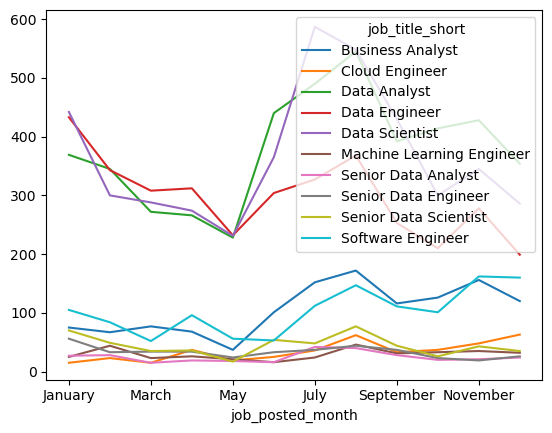

In [18]:
df_italy_pivot.plot()

In [33]:
top_3 = df_italy['job_title_short'].value_counts().head(3)

In [34]:
top_3 = top_3.index.to_list()

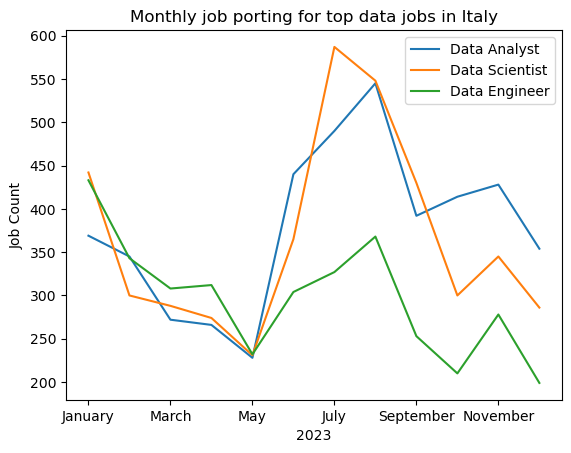

In [21]:
df_italy_pivot[top_3].plot(kind='line')
plt.title('Monthly job porting for top data jobs in Italy')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()